In [1]:
import numpy as np
"""
NOTE: I like my explanations to be where it is actually being used, explained just before it is used
"""
class Perceptron(object):
    """initialize with the following set of information (parameters)
       eta (float): sufficiently small learning rate as required by the theory
       n_iter (int): epoch; number of passes over the training dataset to prevent continual 
       calculations should it not be linearly separable as the theory requires
       random_state (int): random seed but reproducible random seed
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        #take the current state in but use the values put in; nothing interesting about an __init__ tbh
    
    """Fit training data (parameters)
            self: take in self
            array-like... well no explaination I've found is not tautological in some regard but noting it for myself as "if it can be passed in as an array, that is how it will be defined; that is, it will do it's best to create something compatible with what was passed in" 
            X (array-like): shape = [n_examples, n_features]
                meaning training vectors, and obvious explanation as the parameter names are descriptive
                connecting to the theory by R^(m+1), m being number of features, 1 for the bias unit that is the first element in the vector
            y (array-like): shape = [n_examples]
                target values
        Return: self (object)
        
        w_ (array): post fitting weights
        errors (list): count of misclassifications/updates in each epoch
        """
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        #mean, spread, int of meaning that is 1 + the n of (m*n) to represent the number of observations from norm
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        #where the vectors are codirectional or 90 degrees, return 1 but if no -1
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
#inside this arccos evaluates to 1, which is just 0
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

In [3]:
import os
import pandas as pd
#link to iris dataset
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<function matplotlib.pyplot.show(close=None, block=None)>

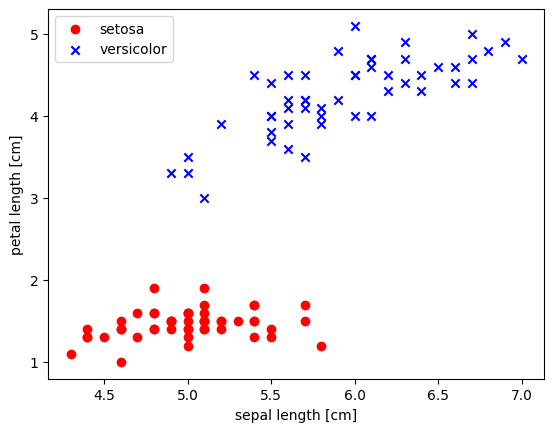

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor; 100 observations/rows, values of column/feature 4
y = df.iloc[0:100, 4].values
#where it is setosa, -1, if not 1
y = np.where(y == 'Iris-setosa', -1, 1)

# df comprised only of sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show

#linear decision boundary, easy so perceptron model should work well here

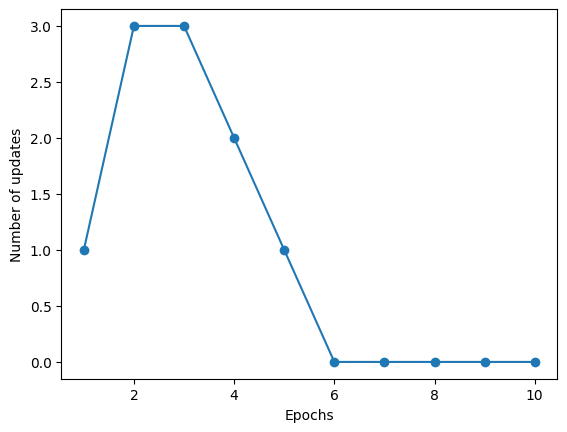

In [5]:
#training the perceptron model
ppn = Perceptron(eta=.01, n_iter=10)
ppn.fit(X,y)

#check the misclassification errors per epoch to see if the algorithm converged & created a decision boundary
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()
#converges after the sixth, should be able to do it easily

In [6]:
#convenience function for visualization of 2-D datasets
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) #one color belongs to each "kind" of y/result

    # plot the decision surface
    #reminder that X here is a df, this is .min() from pandas library
    #all of X's rows in first column as min and max
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    #same as above, just for the second column, as min and max
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #create pair of grid arrays from min/max feature vectors
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #rectangular grid from 2 1-D arrays, a Cartesian/Matrix indexing;
    #.ravel() to flatten the array
    #.T is transposing the array to have the same number of columns as the training subet
    #allows us to use the predict methog
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #Z now has the shaping of xx1's shape
    Z = Z.reshape(xx1.shape)
    #draw contour plot, each decision region gets a different color for each predicted class
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

C:\Users\monae\AppData\Local\Temp\ipykernel_13884\1521511839.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


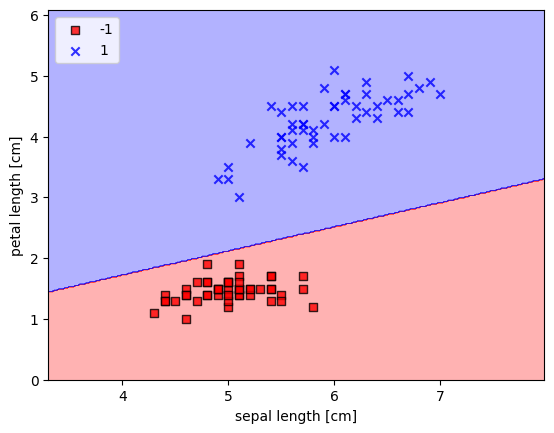

In [7]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

Short Explanations for me
Adaline:
- updates weights by linear activation function
- compares true class labels to the functions continued output to get error and adjust weights
- is a real number for φ(z^(i)) with z^(i)=(w^T)(x^(i))
- 
Same: 
- the use of a threshold function to make the final prediction
Perceptron:
- updates weights by the unit step function
- compares true class labels to the predicted labels
- is an integer class label for φ(z^(i)) 

Would like a little more coverage here for my own understanding later


Key Element for supervised MLA is a objective function to be optimized, most often a cost function
- Adaline's is the SSE, sum of squared errors (as I recall, a measure of difference between observed value and predicted)
- With it being continuous, it is differentiable (or at least implies there's never a sharp bend/turn, etc to make it not differentiable at random points, letting it go for now until I have a better understanding of the cost function)
- It's convex nature means we can just use gradient descent to find the weights to minimize cost funtion for classification

Gradient descent is basically rolling down a hill until there's a natural low point
- Adaline's has a real number, not an integer class label; the weight update is calculated on all samples so is more specifically bath gradient descent unlike updates after each sample (perceptron)

Notes to me: look at relu, leaky relu and softmax

In [8]:
#implementation
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters are the same as before since the first rule is very similar to this one
    Changes are to attributes, not w_ though:
    cost_ (list): Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        See prior things for those notes as those also have not changed
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            #because activation method is just an identity function (conceptual),
            # it is stated more directly here, shows how info flows through single layer
            # neural network
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            #all but bias unit to m; feature maxtrix multiplied against error vector 
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum() #obv bias unit
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)        

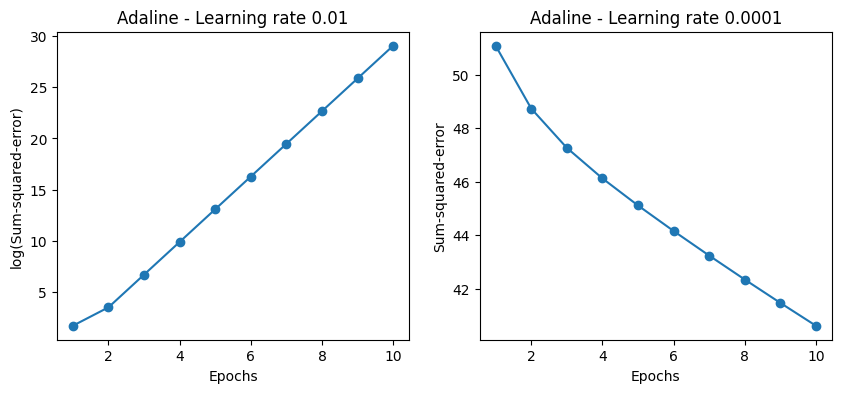

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
#too large, error is larger with each epoch
#overshoot global minimum

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
#too small, takes too many epochs to converge to global cost minimum
# plt.savefig('images/02_11.png', dpi=300)
plt.show()

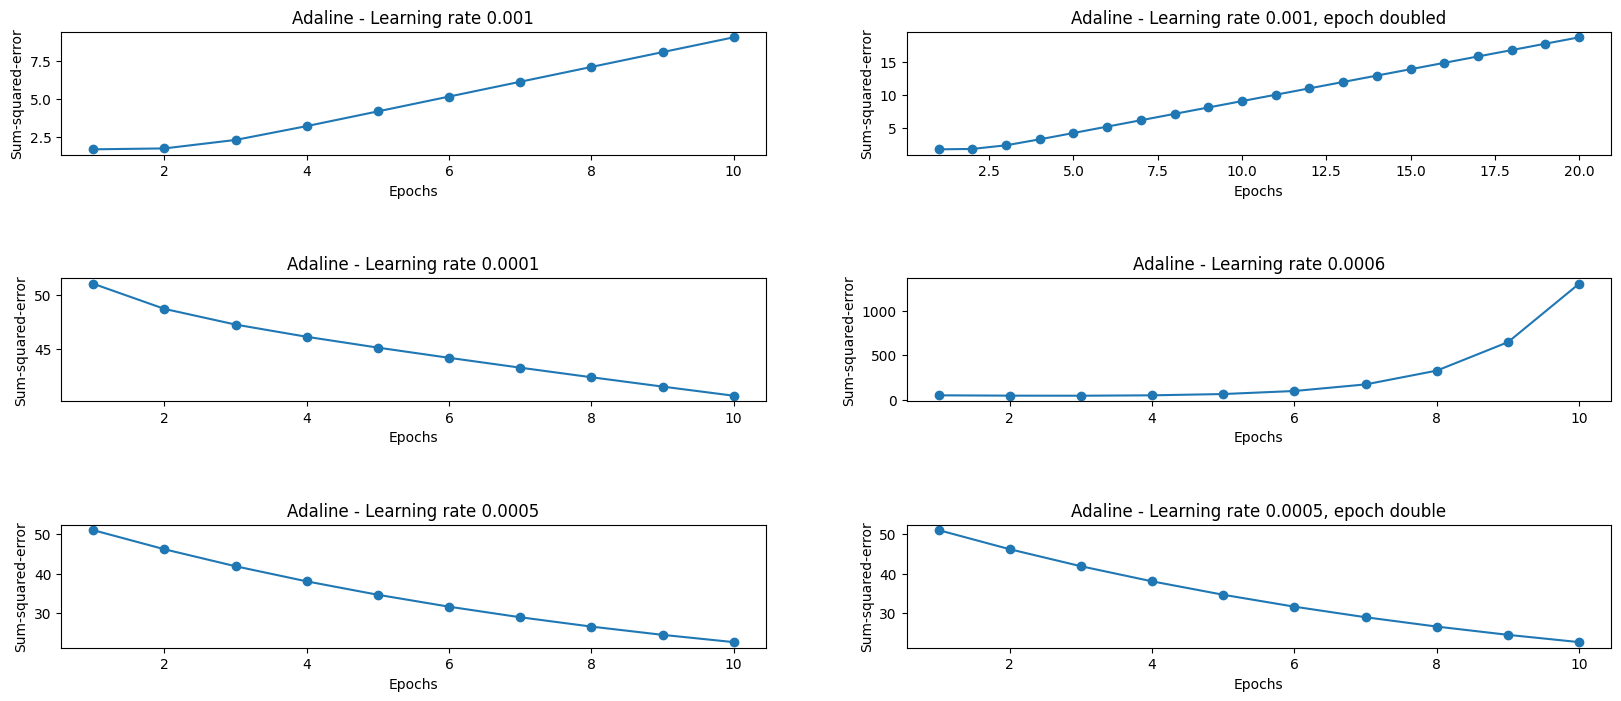

In [10]:
#play with numbers for my own edification
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 8))
#fig.tight_layout() - did not fix, dunno why, not to interested in finding out
#manage height reserved for the white space, didn't want to deal with overlapping axis/labels
fig.subplots_adjust(hspace=1) 

ada3 = AdalineGD(n_iter=10, eta=0.001).fit(X, y)
ax[0,0].plot(range(1, len(ada3.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('Sum-squared-error')
ax[0,0].set_title('Adaline - Learning rate 0.001')
#smaller eta, still not small enough

ada4 = AdalineGD(n_iter=20, eta=0.001).fit(X, y)
ax[0,1].plot(range(1, len(ada4.cost_) + 1), np.log10(ada4.cost_), marker='o')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Sum-squared-error')
ax[0,1].set_title('Adaline - Learning rate 0.001, epoch doubled')
#same eta, increase iter... LOL, nope

ada5 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1,0].plot(range(1, len(ada5.cost_) + 1), ada5.cost_, marker='o')
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('Sum-squared-error')
ax[1,0].set_title('Adaline - Learning rate 0.0001')
#put iter back, decrease eta again, ah that does something in the correct direction!

ada6 = AdalineGD(n_iter=10, eta=0.0006).fit(X, y)
ax[1,1].plot(range(1, len(ada6.cost_) + 1), ada6.cost_, marker='o')
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('Sum-squared-error')
ax[1,1].set_title('Adaline - Learning rate 0.0006')


ada7 = AdalineGD(n_iter=10, eta=0.0005).fit(X, y)
ax[2,0].plot(range(1, len(ada7.cost_) + 1), ada7.cost_, marker='o')
ax[2,0].set_xlabel('Epochs')
ax[2,0].set_ylabel('Sum-squared-error')
ax[2,0].set_title('Adaline - Learning rate 0.0005')
#.0006 brings it back to increasing with each epoch so pause here 

ada8 = AdalineGD(n_iter=20, eta=0.0005).fit(X, y)
ax[2,1].plot(range(1, len(ada7.cost_) + 1), ada7.cost_, marker='o')
ax[2,1].set_xlabel('Epochs')
ax[2,1].set_ylabel('Sum-squared-error')
ax[2,1].set_title('Adaline - Learning rate 0.0005, epoch double')
#alright but what if double epock again? maybe


plt.show()
#nah, done with my little guessing game but it was cool to have the graphical toy to see it happen

Feature Scaling
Gradient descent benefits from it, using method called standardization; 
give property of norm dist -> converge quicker
centers mean of each feature at zero, with st.dev of 1
Less steps to go through to find the global cost minimum

In [11]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

C:\Users\monae\AppData\Local\Temp\ipykernel_13884\1521511839.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


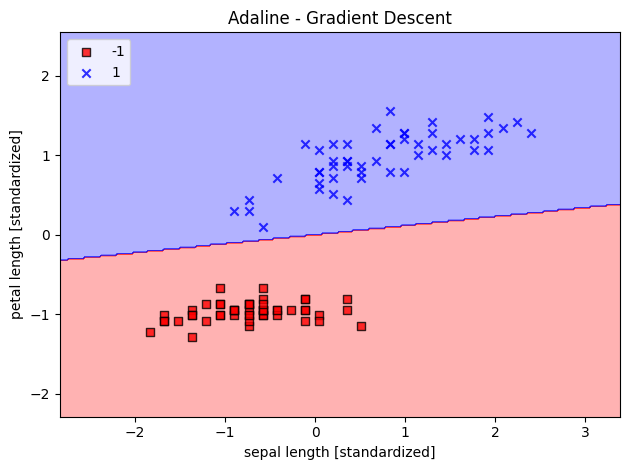

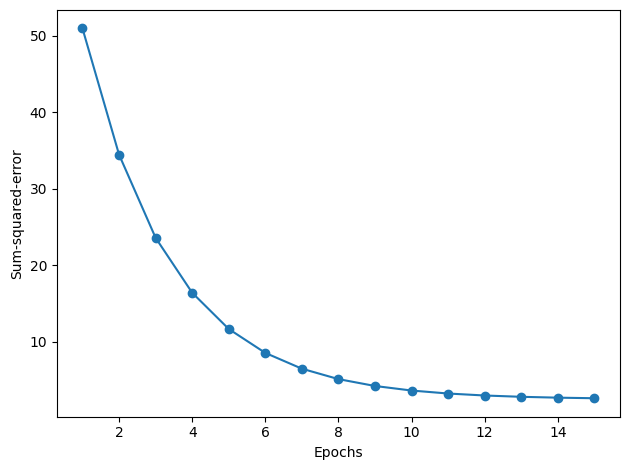

In [12]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

#ok so regardless, was going to have to increase iterations
#but standardizing on a normal curve is notably "finniky"
#noting that SSE != 0 despite correct classification

Alright, so that's great and all but doesn't really work out when there's millions of data points (more common than not in MLA) but man, that's EXPENSIVE computationally.
So... what now?
Shoot for a stochastic gradient descent (we're getting even *fancier*.
AKA: iterative/online gradient descent

This time, it updates weights by the sum of accumulated errors for all samples
No, I'm not going to bother translating math. ONLY WORDS.

Convergence happens EVEN FASTER because the frequency of updates has increased
Each gradient is calculated on a single training example, so the error surface is noiser
- never fear! this is good because this method can escape shallow local minima more easily with nonlinear cost functions
- but! your training data MUST be in a random order; shuffle between epochs to avoid cycling
Advantage of SGD is use for online learning
- meaning to train on the fly as new training data comes in
- great in cases where we are accumulating large amounts of data
- immediately adapt to changes and the training data can be discarded after updating if needing the storage space back

Compromise on BGD and SGD is mini-batch learning
- meaning to apply BGD to smaller subsets of the training data, x samples at a time
- speeds up convergence because of more frequent weight updates
- also can for loop if SGD with vectorized operations (increases computational efficiency)

In [13]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters: only new thing is
    shuffle(bool): Shuffles training data every epoch if True to prevent cycles.

    Attributes: only change is
    cost_(list): Sum-of-squares cost function value averaged over all
      training examples in each epoch. 
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.
        Parameters: same as before
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights
        for online learning"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

C:\Users\monae\AppData\Local\Temp\ipykernel_13884\1521511839.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


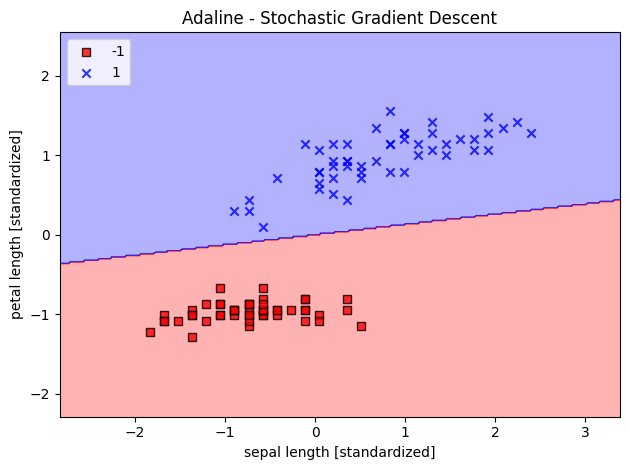

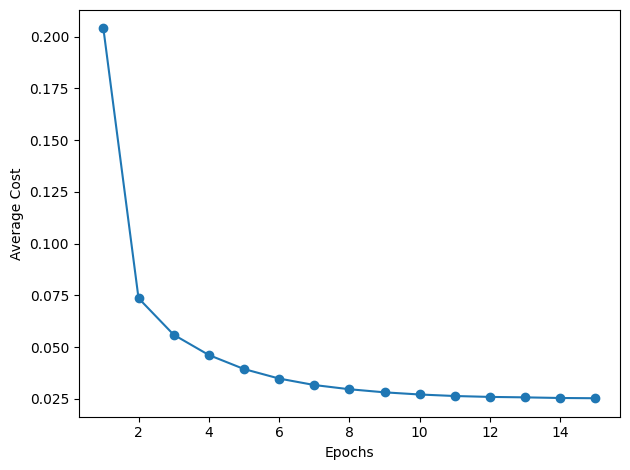

In [14]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [15]:
ada_sgd.partial_fit(X_std[0, :], y[0])